**Import Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D, Dropout

**Define Input Layer**

In [2]:
input_layer = Input(shape=(28, 28, 1))

**Add Convolutional and Transpose Convolutional Layers**

In [3]:
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer) 
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer) 

**Create Model**

In [4]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

**Compile Model**

In [5]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

**Train Model**

In [6]:
# Generate synthetic training data 
X_train = np.random.rand(1000, 28, 28, 1) 
y_train = X_train # For reconstruction, the target is the input 
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) 

Epoch 1/10
25/25 [==============================] - 9s 39ms/step - loss: 0.0785 - accuracy: 0.0000e+00 - val_loss: 0.0689 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.0000e+00 - val_loss: 0.0492 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0408 - accuracy: 0.0000e+00 - val_loss: 0.0318 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.0000e+00 - val_loss: 0.0185 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0141 - accuracy: 0.0000e+00 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_los

**Evaluate Model**

In [7]:
# Generate synthetic test data
X_test = np.random.rand(200, 28, 28, 1)
y_test = X_test

loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

7/7 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Test loss: 0.002355629112571478
Test accuracy: 0.0


**Visualize Results**

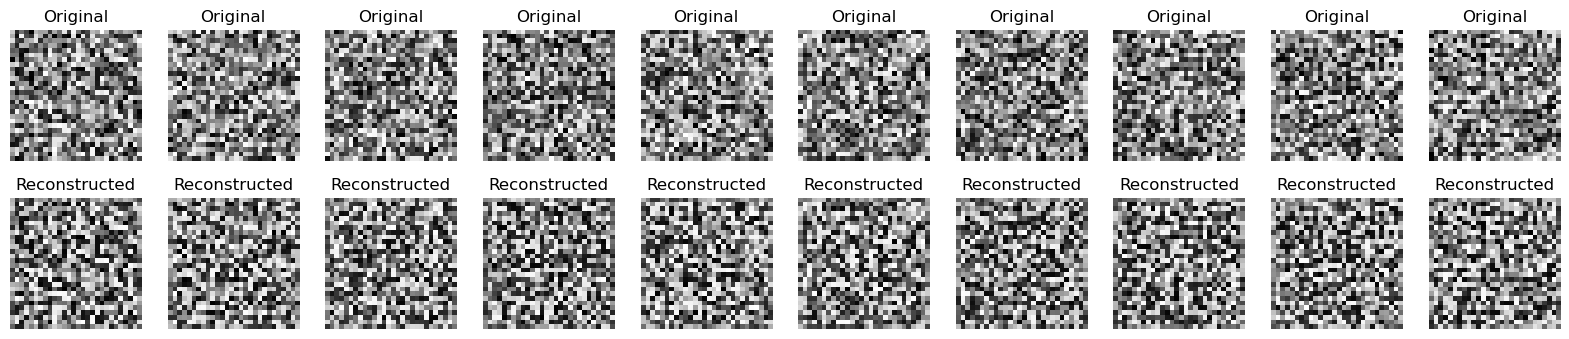

In [8]:
# Predict on test data 
y_pred = model.predict(X_test) 

# Plot some sample images 
n = 10 # Number of samples to display 

plt.figure(figsize=(20, 4))

for i in range(n): 

    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original") 
    plt.axis('off') 
    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show() 

**Experiment with Different Kernel Sizes**

In [9]:
# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/10
25/25 [==============================] - 1s 13ms/step - loss: 0.0657 - accuracy: 0.0000e+00 - val_loss: 0.0454 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.0000e+00 - val_loss: 0.0156 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_los

**Add Dropout Layers**

In [10]:
# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 0.0765 - accuracy: 0.0000e+00 - val_loss: 0.0625 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0532 - accuracy: 0.0000e+00 - val_loss: 0.0388 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.0000e+00 - val_loss: 0.0229 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.0000e+00 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0169 - accuracy: 0.0000e+00 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 0.0000e+00 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 0.0000e+00 - val_los

**Use Different Activation Functions**

In [11]:
# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/10
25/25 [==============================] - 1s 9ms/step - loss: 0.0944 - accuracy: 0.0000e+00 - val_loss: 0.0497 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.0000e+00 - val_loss: 0.0212 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0156 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss